# **Ai project cycle**

dalam pembuatan suatu machine learning ada beberapa tahap
1. Problem Scopping yaitu penjelasan mengenai permasalahan yang terkait kemudian bisa diselesaikan dengan machine learning.
2. Data Accuisition sumber data yang untuk aplikasi "https://github.com/sstevenadi/StuntingDataAnalysis.git"

3. preprocessing data, proses mengubah data mentah ke dalam bentuk yang lebih mudah dipahami.

4. Data Exploration tahapan pemrosesan data meliputi:
          a.statistik
          b.deskriptif
          c.visualitatif
5. modelling algoritma yang digunakan dalam pengklasifikasian data
6. penjabaran hasil yang didapat untuk menguji akurasi data yang akan digunakan.
7. deployment pengaplikasian dalam bentuk web menggunakan Flask (framework phython) memudahkan pengguna


# **Preprocessing Data**

In [ ]:
pip install kneed

In [ ]:
#menampilkan Grafik
import matplotlib.pyplot as plt
import seaborn as sns

#data Transformation
import pandas as pd
import numpy as np

#membanru dalam pembuatan model dan mempersiapkan data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from sklearn import model_selection

#model yang digunakan
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model Clustering
from sklearn.cluster import KMeans

#magic line untuk matplotlib
%matplotlib inline

In [ ]:
#membaca data
url =  ('https://raw.githubusercontent.com/kilua762/malnutrition-classification/main/Data/Stunting.xlsx')
data_stunting = pd.read_excel(url)

In [ ]:
#Didalam data terdapat beberapa char non-ascii jadi di hilangkan dahulu
data_stunting = data_stunting.applymap(lambda x : x.replace('\xa0', '') if type(x) == str else x)

data_stunting.sample(10)

<ipython-input-4-3612b871a3dc>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_stunting = data_stunting.applymap(lambda x : x.replace('\xa0', '') if type(x) == str else x)


,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
113,5305421601190001,FORCIUS C. OELEU,L,2019-01-16,3,NaN,PAULUS SOLA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.07,Pendek,-2.37,Gizi Baik,-1.13,T,0,1.0,-,-
86,5305421001180000,GABRIEL A. SENGKOEN,L,2018-01-10,2.5,0,AGUSTINUS SENGKOEN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.36,Pendek,-2.65,Gizi Baik,-1.22,N,0,1.0,-,-
267,5305423101217454,STEVEN J. METBOKI,L,2021-01-31,2.9,49,JONISIUS METBOKI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.29,Pendek,-2.26,Gizi Baik,-1.60,T,-,1.0,-,-
245,5305425509217627,LAURA NAITILI,P,2021-09-15,2,0,PAULUS KOLO,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-5.86,Sangat Pendek,-5.64,Gizi Kurang,-2.30,O,-,NaN,-,-
272,5305422606202500,YOHANES G. METBOKI,L,2020-06-26,2.5,47,ANTONIUS SERAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.21,Pendek,-2.39,Gizi Baik,-1.49,N,0,1.0,-,-
10,53013,ALVINO R. TAONE,L,2018-02-04,2.9,NaN,MELKI TAONE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.89,Sangat Pendek,-3.02,Gizi Baik,-1.73,T,0,1.0,-,-
259,5305426505205264,STEFANIA OLA,P,2020-05-25,2.7,48,MARSELINA NAILIU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.08,Pendek,-2.38,Gizi Baik,-1.20,N,0,1.0,-,-
63,5305422108194334,LENTIUS G. NAITILI,L,2019-08-21,3.5,49,ELPIDUS NAITILI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.06,Pendek,-2.12,Gizi Baik,-1.31,T,-,1.0,-,-
185,5305421303170000,EGIDIUS OELEU,L,2017-03-13,2.7,0,YOHANES OELEU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.16,Pendek,-2.55,Gizi Baik,-0.93,T,0,NaN,-,-
43,5303205410170001,Chalista M.Naisanit,P,2017-10-14,2.9,0,Rikardus Nailake,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.11,Pendek,-2.55,Gizi Kurang,-2.31,T,0,1.0,-,-


In [ ]:
#Melihat info data
data_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIK                 311 non-null    object 
 1   Nama                311 non-null    object 
 2   JK                  311 non-null    object 
 3   Tgl Lahir           311 non-null    object 
 4   BB Lahir            311 non-null    object 
 5   TB Lahir            217 non-null    object 
 6   Nama Ortu           311 non-null    object 
 7   Prov                311 non-null    object 
 8   Kab/Kota            311 non-null    object 
 9   Kec                 311 non-null    object 
 10  Pukesmas            311 non-null    object 
 11  Desa/Kel            311 non-null    object 
 12  Posyandu            311 non-null    object 
 13  RT                  193 non-null    float64
 14  RW                  193 non-null    float64
 15  Alamat              311 non-null    object 
 16  Usia Saa

In [ ]:
#Melihat data yang tidak ada nilainya atau null
data_stunting.isna().sum()

,0
NIK,0
Nama,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,94
Nama Ortu,0
Prov,0
Kab/Kota,0
Kec,0


In [ ]:
# Mengatasi data yang tidak ada nilainya
data_stunting.dropna()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
5,5305424808170000,RIVALDO METAN,L,2017-08-08,2.9,0,DEDI Y. FOLE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.55,Pendek,-2.09,Gizi Baik,-0.41,N,0,1.0,-,-
24,5303201003170001,marten naiobe,L,2017-03-10,2.3,0,david naiobe,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.37,Pendek,-2.59,Gizi Baik,-1.24,N,0,1.0,-,-
30,5305426812191816,BERNADINA NATALIA NAISALI,P,2019-12-28,3,48,YOS BANASE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.01,Pendek,-2.10,Gizi Baik,0.18,N,0,1.0,-,-
34,5305420612170001,PAULO D. BALA,L,2017-12-06,3,0,KLAUDIUS METBOKI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.42,Pendek,-2.18,Gizi Baik,-1.74,T,0,1.0,-,-
35,5305424211170001,ADRIELA N. OMENU,P,2017-11-02,2.6,0,FIDELIS OMENU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.79,Pendek,-2.92,Gizi Baik,0.01,T,0,1.0,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5305422507204717,ALEXAN M. NAITILI,L,2020-07-25,2.9,49,YOSEPH G. ABI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.50,Pendek,-2.22,Gizi Baik,-0.62,T,0,1.0,-,-
306,5305424808201533,FELISIA AIRIN BIKOLO,P,2020-08-08,2.5,46,YULIUS KOLO,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.29,Pendek,-2.81,Gizi Kurang,-2.57,T,0,1.0,-,-
307,5305426608209012,ALISKA G. UN,P,2020-08-26,3.7,50,FELIX UN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.82,Pendek,-2.18,Gizi Baik,-1.05,T,0,1.0,-,-
308,5305420902219648,FEBRIANUS T. SURI,L,2021-02-09,2.6,48,FLAVIANUS O. SURI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.23,Pendek,-2.69,Gizi Baik,-1.17,T,-,1.0,-,-


In [ ]:
#mengubah jenis data jenis kelamin yang ketegorikal menjadi angka
data_stunting['JK'].replace({'L':1, 'P':0}, inplace=True)

<ipython-input-8-5345e20338ca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_stunting['JK'].replace({'L':1, 'P':0}, inplace=True)
<ipython-input-8-5345e20338ca>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_stunting['JK'].replace({'L':1, 'P':0}, inplace=True)


In [ ]:
#Mengubah value 0 pada BB Lahir menjadi median
data_stunting['BB Lahir'] = pd.to_numeric(data_stunting['BB Lahir'])
data_stunting['BB Lahir'] = data_stunting['BB Lahir'].apply(lambda x : data_stunting['BB Lahir'].median() if x <= 0 else x)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,0,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,Sangat Pendek,-3.42,Gizi Baik,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,1,2017-07-28,2.8,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,Sangat Pendek,-3.86,Risiko Gizi Lebih,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,1,2018-03-02,2.8,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,Pendek,-2.95,Gizi Baik,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,0,2017-04-10,2.8,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,Pendek,-2.25,Gizi Baik,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,0,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,Pendek,-2.41,Gizi Baik,-0.68,T,0,1.0,-,-


In [ ]:
#Mengubah value 0 pada TB Lahir menjadi median
data_stunting['TB Lahir'] = pd.to_numeric(data_stunting['TB Lahir'])
data_stunting['TB Lahir'] = data_stunting['TB Lahir'].apply(lambda x : data_stunting['TB Lahir'].median() if x <= 0 else x)
data_stunting['TB Lahir'].fillna(data_stunting['TB Lahir'].median(), inplace=True)

data_stunting.head()

<ipython-input-10-46ba5c0a8974>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_stunting['TB Lahir'].fillna(data_stunting['TB Lahir'].median(), inplace=True)


,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,0,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,Sangat Pendek,-3.42,Gizi Baik,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,1,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,Sangat Pendek,-3.86,Risiko Gizi Lebih,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,1,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,Pendek,-2.95,Gizi Baik,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,0,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,Pendek,-2.25,Gizi Baik,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,0,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,Pendek,-2.41,Gizi Baik,-0.68,T,0,1.0,-,-


In [ ]:
#Mengubah value usia menjadi sebuah angka
data_stunting['Usia Saat Ukur'] = data_stunting['Usia Saat Ukur'].apply(lambda x : float(x[0]))

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,0,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,Sangat Pendek,-3.42,Gizi Baik,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,1,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,Sangat Pendek,-3.86,Risiko Gizi Lebih,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,1,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,Pendek,-2.95,Gizi Baik,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,0,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,Pendek,-2.25,Gizi Baik,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,0,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,Pendek,-2.41,Gizi Baik,-0.68,T,0,1.0,-,-


In [ ]:
#memilih kolom yang mempengaruhi data
data_stunting = data_stunting[['JK','BB Lahir','TB Lahir', 'Usia Saat Ukur','Berat','Tinggi']]

data_stunting.head()

,JK,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi
0,0,2.9,48.0,4.0,11.2,89.0
1,1,2.8,47.0,4.0,14.2,89.8
2,1,2.8,47.0,3.0,11.4,90.6
3,0,2.8,47.0,4.0,12.3,97.8
4,0,2.8,47.0,3.0,12.1,90.8


# **Cluster Data dengan K-Means**

In [ ]:
X_means = data_stunting.iloc[:, 4:6]
X_means.head()

,Berat,Tinggi
0,11.2,89.0
1,14.2,89.8
2,11.4,90.6
3,12.3,97.8
4,12.1,90.8


In [ ]:
array_x = np.array(X_means)
array_x

array([[11.2, 89. ],
       [14.2, 89.8],
       [11.4, 90.6],
       [12.3, 97.8],
       [12.1, 90.8],
       [14.2, 97.5],
       [ 9.3, 85.3],
       [10.3, 88.8],
       [11. , 85.7],
       [12. , 90.1],
       [11.4, 90.7],
       [14.3, 97.4],
       [10.5, 84.6],
       [ 9.4, 81. ],
       [ 9.2, 82.2],
       [10.4, 78.1],
       [10.2, 82.7],
       [ 9.6, 78.6],
       [12.3, 91.1],
       [ 8.2, 78.5],
       [14. , 92.7],
       [13.2, 92.5],
       [ 9.9, 84.2],
       [ 9.8, 84. ],
       [13.3, 97.5],
       [11.4, 92.4],
       [12.7, 92.4],
       [12. , 95.7],
       [12.3, 90.2],
       [ 9. , 81.9],
       [10.4, 80. ],
       [ 9. , 80.2],
       [ 9. , 79.3],
       [ 8.5, 77. ],
       [12.3, 95.2],
       [13.1, 91.8],
       [12.3, 97.4],
       [11.5, 93.8],
       [13.9, 97.9],
       [13. , 91.8],
       [10.9, 90. ],
       [13.3, 95. ],
       [11.3, 93.1],
       [11.1, 93.6],
       [11.4, 94.2],
       [12. , 91. ],
       [11.1, 87.3],
       [10.4,

In [ ]:
from pandas.core.arrays.sparse import array
scaler_fit = MinMaxScaler()
scaled_x = scaler_fit.fit_transform(array_x)
scaled_x

array([[0.63565891, 0.78757515],
       [0.86821705, 0.80360721],
       [0.65116279, 0.81963928],
       [0.72093023, 0.96392786],
       [0.70542636, 0.82364729],
       [0.86821705, 0.95791583],
       [0.48837209, 0.71342685],
       [0.56589147, 0.78356713],
       [0.62015504, 0.72144289],
       [0.69767442, 0.80961924],
       [0.65116279, 0.82164329],
       [0.87596899, 0.95591182],
       [0.58139535, 0.6993988 ],
       [0.49612403, 0.62725451],
       [0.48062016, 0.65130261],
       [0.57364341, 0.56913828],
       [0.55813953, 0.66132265],
       [0.51162791, 0.57915832],
       [0.72093023, 0.82965932],
       [0.40310078, 0.57715431],
       [0.85271318, 0.86172345],
       [0.79069767, 0.85771543],
       [0.53488372, 0.69138277],
       [0.52713178, 0.68737475],
       [0.79844961, 0.95791583],
       [0.65116279, 0.85571142],
       [0.75193798, 0.85571142],
       [0.69767442, 0.92184369],
       [0.72093023, 0.81162325],
       [0.46511628, 0.64529058],
       [0.

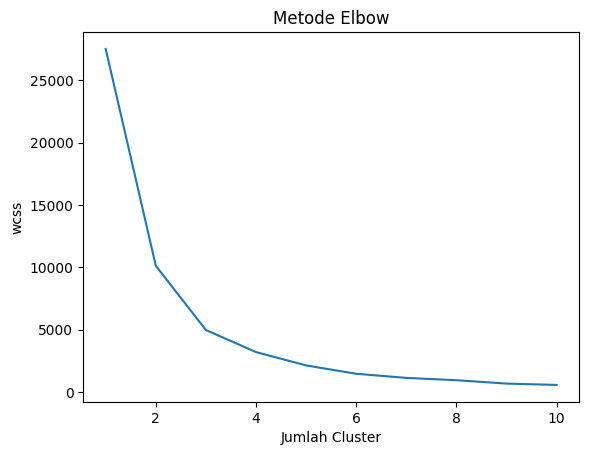

In [ ]:
#perhitungan cluster dengan k-means dan visualisasi dengan metode ELBOW
wcss = []
for i in range (1,11) :
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_means)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters= k, init = 'k-means++', random_state = 42)
  kmeans.fit(scaled_x)
  sse.append(kmeans.inertia_)

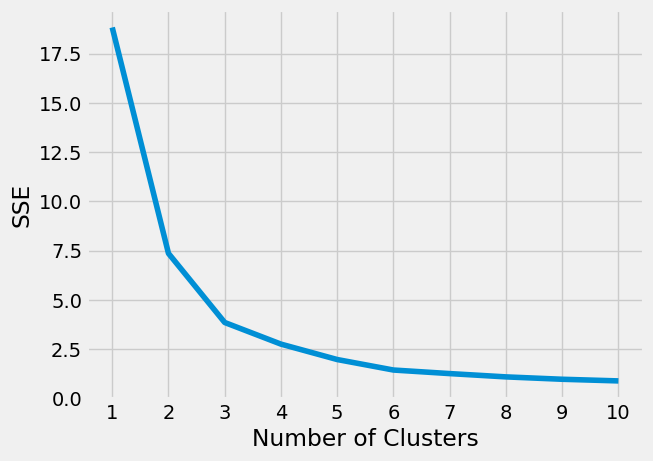

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing" )
kl.elbow

np.int64(3)

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42)

In [ ]:
kmeans.fit(scaled_x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
data_stunting["cluster"] = kmeans.labels_

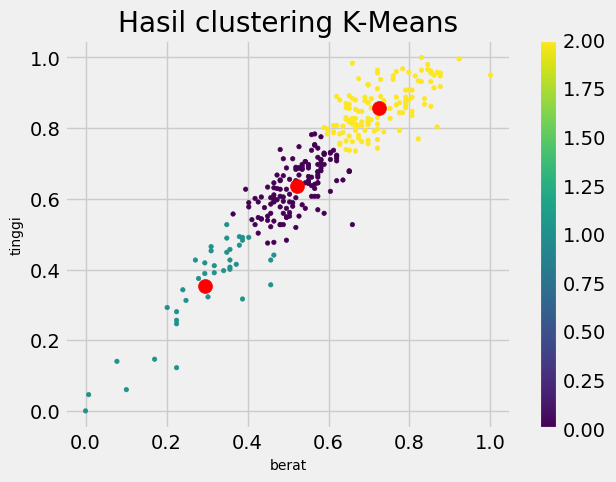

In [ ]:
output = plt.scatter(scaled_x[: ,0], scaled_x[: ,1], s = 10, c = data_stunting.cluster)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1, marker="o");
plt.title("Hasil clustering K-Means")
plt.colorbar (output)
plt.xlabel('berat' ,fontsize = 10)
plt.ylabel('tinggi' ,fontsize = 10)
plt.show()

keterangan tabel:


1.   titik merah merupakan penanda titik lokasi
  cluster
2.   warna hitam merupakan cluster 0
3.  warna hijau merupakan cluster 1
4. warna kuning merupakan cluster 2

Kesimpulan warna hitam/cluster 0 nilai yang relatif sedang, warna hijau/cluster 1 nilai yang relatif rendah, warna kuning/cluster 2 merupakan kelompok yang relatif tinggi

In [ ]:
data_stunting.sample(10)

,JK,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,cluster
256,0,2.3,47.0,0.0,4.3,52.7,1
99,1,1.7,47.0,3.0,10.2,88.7,0
205,1,2.8,48.0,3.0,12.3,89.5,2
289,0,3.0,48.0,1.0,10.6,77.6,0
24,1,2.3,47.0,4.0,13.3,97.5,2
235,1,3.3,49.0,2.0,10.1,82.2,0
182,1,2.9,47.0,2.0,8.8,81.3,0
71,0,2.7,47.0,4.0,13.0,93.2,2
124,1,3.2,47.0,2.0,11.0,82.2,0
274,1,3.5,48.0,1.0,8.0,74.2,1


In [ ]:
#Export File to .csv
data_stunting.to_csv("StuntingCluster.csv",index = False)

# **Visualisasi Data**

In [ ]:
#mencari korelasi antar tiap data
data_stunting.corr()
# jika angka menunjukan 0 menandakan netral, jika angka bernilai lebih dari 0 menandakan nilai yang kuat, jika angka bernilai negatif 0 menandakan nilai yang lemah

,JK,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,cluster
JK,1.000000,-0.012998,-0.037605,-0.080231,0.060552,0.000285,0.034854
BB Lahir,-0.012998,1.000000,0.033538,-0.022732,0.017315,-0.004837,-0.019633
TB Lahir,-0.037605,0.033538,1.000000,-0.169544,-0.098874,-0.126809,-0.106300
Usia Saat Ukur,-0.080231,-0.022732,-0.169544,1.000000,0.851308,0.923831,0.626659
Berat,0.060552,0.017315,-0.098874,0.851308,1.000000,0.931671,0.576848
Tinggi,0.000285,-0.004837,-0.126809,0.923831,0.931671,1.000000,0.560544
cluster,0.034854,-0.019633,-0.106300,0.626659,0.576848,0.560544,1.000000


In [ ]:
data_stunting.groupby('cluster').size()

,0
cluster,
0,136
1,39
2,136


In [ ]:
# pengecekan data jika ada yang bernilai null
pd.isnull(data_stunting).any()

,0
JK,False
BB Lahir,False
TB Lahir,False
Usia Saat Ukur,False
Berat,False
Tinggi,False
cluster,False


# **Modelling**

In [ ]:
# inisialisasi data dan target
target = data_stunting['cluster']
features = data_stunting.drop(['cluster'], axis = 1)

In [ ]:
validation_size = 0.20
seed = 0
X_train, X_test, y_train, y_test = model_selection.train_test_split(features.to_numpy(), target, test_size=validation_size, random_state=seed)

Penambahan SMOTE merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas.

In [ ]:
print("sebelum Smote, jumlah kelas normal : {}".format(sum(y_train == 0)))
print("sebelum Smote, jumlah kelas stunting : {}".format(sum(y_train == 1)))
print("sebelum Smote, jumlah kelas overweight : {}".format(sum(y_train == 2)))

sebelum Smote, jumlah kelas normal : 105
sebelum Smote, jumlah kelas stunting : 31
sebelum Smote, jumlah kelas overweight : 112


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

<ipython-input-32-e58d73960fff>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [ ]:
print("sesudah Smote, jumlah kelas normal : {}".format(sum(y_train_res == 0)))
print("sesudah Smote, jumlah kelas overweight : {}".format(sum(y_train_res == 2)))
print("sesudah Smote, jumlah kelas stunting : {}".format(sum(y_train_res == 1)))

sesudah Smote, jumlah kelas normal : 112
sesudah Smote, jumlah kelas overweight : 112
sesudah Smote, jumlah kelas stunting : 112


In [ ]:
# Train dan evaluasi model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
  results = {}
  # train model
  model.fit(train_features, y_train)
  #test model
  train_predicted = model.predict(train_features)
  test_predicted = model.predict(test_features)
  #classification report and confusion matrix
  results['classification_report'] = classification_report(y_test, test_predicted)
  results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
  results['accuracy'] = format(accuracy_score(y_test, test_predicted)*100)

  return results

fungsi : mencoba dan mengevaluasi klasifikasi pada machine learning

model: klasifikasi machine learning
train features: fitur pada train data
y_train = pengecekan cluster sebanyak 80%
test_features = fitur selain cluster
y_test = testing cluster sebanyak 20%

hasil berupa klasifikation report, confusion matrix, dan akurasi




In [ ]:
#inisialisasi model
sv = SVC(random_state = 1, probability=True)
rf = RandomForestClassifier(random_state = 0, n_estimators=1001)
gnb = GaussianNB()
lr = LogisticRegression(random_state=0, max_iter = 5000, solver='lbfgs')
knn = KNeighborsClassifier(n_neighbors=3)

# evaluasi model
results = {}
for cls in [sv, rf, gnb, lr, knn]:
  cls_name = cls.__class__.__name__
  results[cls_name] = {}
  results[cls_name] = fit_eval_model(cls, X_train_res, y_train_res, X_test, y_test)


In [ ]:
#melihat hasil classifier
for result in results:
  print (result)
  print()
  for i in results[result]:
    print (i, ':')
    print(results[result][i])
    print()
  print('______')
  print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.96      0.87      0.92        31
           1       0.89      1.00      0.94         8
           2       0.88      0.96      0.92        24

    accuracy                           0.92        63
   macro avg       0.91      0.94      0.93        63
weighted avg       0.92      0.92      0.92        63


confusion_matrix :
[[27  1  3]
 [ 0  8  0]
 [ 1  0 23]]

accuracy :
92.06349206349206

______

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        24

    accuracy                           0.98        63
   macro avg       0.99      0.99      0.99        63
weighted avg       0.98      0.98      0.98        63


confusion_matrix :
[[31  0  0]
 [ 0  8  0]
 [ 1  0 23]]

accurac

In [ ]:
data_stunting.head(10)

,JK,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,cluster
0,0,2.9,48.0,4.0,11.2,89.0,2
1,1,2.8,47.0,4.0,14.2,89.8,2
2,1,2.8,47.0,3.0,11.4,90.6,2
3,0,2.8,47.0,4.0,12.3,97.8,2
4,0,2.8,47.0,3.0,12.1,90.8,2
5,1,2.9,47.0,4.0,14.2,97.5,2
6,1,2.2,47.0,3.0,9.3,85.3,0
7,1,2.7,48.0,3.0,10.3,88.8,0
8,0,3.2,47.0,3.0,11.0,85.7,0
9,1,3.0,47.0,3.0,12.0,90.1,2


# **Evaluasi Model**

In [ ]:
#Melakukan Testing pada model Random Forest

#manginputkan parameter dengan urutan column pada dataset variabel x yaitu features
mysample = [[0,	2.9,	48.0,	4.0,	11.2,	89.0		]]

#melakukan prdiksi
predicted = rf.predict(mysample)
score = rf.predict_proba(mysample)

if predicted == 0 :
  result = 'Normal'
  accuracy = str(score[0][0]*100)
elif predicted == 1 :
  result = 'Stunting'
  accuracy = str(score[0][1]*100)
else:
  result = 'Overweight'
  accuracy = str(score[0][2]*100)

print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result)

99.10% kemungkinan anda Overweight


In [ ]:
#Melakukan Testing pada model Support Vector Machine

#manginputkan parameter dengan urutan column pada dataset variabel x yaitu features
mysample = [[1,	3.0,	47.0,	4.0, 11.5,	90.3	]]

#melakukan prdiksi
predicted = sv.predict(mysample)
score = sv.predict_proba(mysample)

if predicted == 0 :
  result = 'Normal'
  accuracy = str(score[0][0]*100)
elif predicted == 1 :
  result = 'Stunting'
  accuracy = str(score[0][1]*100)
else:
  result = 'Overweight'
  accuracy = str(score[0][2]*100)

print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result)

96.88% kemungkinan anda Overweight


In [ ]:
#Melakukan Testing pada model Logistic Refgression

#manginputkan parameter dengan urutan column pada dataset variabel x yaitu features
mysample = [[0,2.0,47.0,1.0,7.6,72.5	]]

#melakukan prdiksi
predicted = lr.predict(mysample)
score = lr.predict_proba(mysample)

if predicted == 0 :
  result = 'Normal'
  accuracy = str(score[0][0]*100)
elif predicted == 1 :
  result = 'Stunting'
  accuracy = str(score[0][1]*100)
else:
  result = 'Overweight'
  accuracy = str(score[0][2]*100)

print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result)

99.49% kemungkinan anda Stunting


In [ ]:
#Melakukan Testing pada model K-Nearest Neighbors

#manginputkan parameter dengan urutan column pada dataset variabel x yaitu features
mysample = [[0,	2.9,	48.0,	4.0,	11.2,	89.0	]]

#melakukan prdiksi
predicted = knn.predict(mysample)
score = knn.predict_proba(mysample)

if predicted == 0 :
  result = 'Normal'
  accuracy = str(score[0][0]*100)
elif predicted == 1 :
  result = 'Stunting'
  accuracy = str(score[0][1]*100)
else:
  result = 'Overweight'
  accuracy = str(score[0][2]*100)

print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result)

100.0% kemungkinan anda Overweight


In [ ]:
#Melakukan Testing pada model GaussianNB

#manginputkan parameter dengan urutan column pada dataset variabel x yaitu features
mysample = [[0,	2.9,	48.0,	4.0,	11.2,	89.0	]]

#melakukan prdiksi
predicted = gnb.predict(mysample)
score = gnb.predict_proba(mysample)

if predicted == 0 :
  result = 'Normal'
  accuracy = str(score[0][0]*100)
elif predicted == 1 :
  result = 'Stunting'
  accuracy = str(score[0][1]*100)
else:
  result = 'Overweight'
  accuracy = str(score[0][2]*100)

print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result)

99.95% kemungkinan anda Overweight


# **Export Model**

In [ ]:
# menyimpan model dalam format.pickle Random Forest

import joblib
joblib.dump(rf,'rf_stunting')

['rf_stunting']

In [ ]:
# menyimpan model dalam format.pickle Support Vector Machine

import joblib
joblib.dump(sv,'sv_stunting')

['sv_stunting']

In [ ]:
# menyimpan model dalam format.pickle Logistic Regression

import joblib
joblib.dump(lr,'lr_stunting')

['lr_stunting']

In [ ]:
# menyimpan model dalam format.pickle K-Nearest Neighbors

import joblib
joblib.dump(knn,'knn_stunting')

['knn_stunting']

In [ ]:
# menyimpan model dalam format.pickle GauissianNB

import joblib
joblib.dump(gnb,'gnb_stunting')

['gnb_stunting']